Postion readout for NI card

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
import PyDAQmx as daq

In [2]:
mynicard._start_analog_input()

0

In [3]:
daq.DAQmxCfgSampClkTiming(mynicard._scanner_ai_task, "", 10000, daq.DAQmx_Val_Rising, daq.DAQmx_Val_FiniteSamps, 10000)

0

In [4]:
rawdata = np.zeros(10000, dtype=np.float64)
read = daq.int32()

In [5]:
daq.DAQmxStartTask(mynicard._scanner_ai_task)
daq.DAQmxReadAnalogF64(mynicard._scanner_ai_task, 10000, 1.0, daq.DAQmx_Val_GroupByChannel, rawdata, 10000, daq.byref(read), None)

0

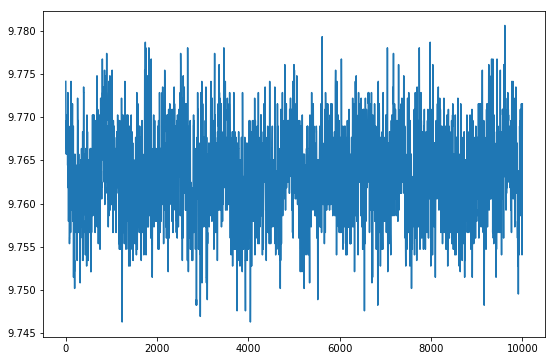

In [6]:
mynicard._stop_analog_input()
plt.plot(rawdata / 10 * 20)
plt.show()

In [7]:
print(np.mean(rawdata)*2)

9.76345774581


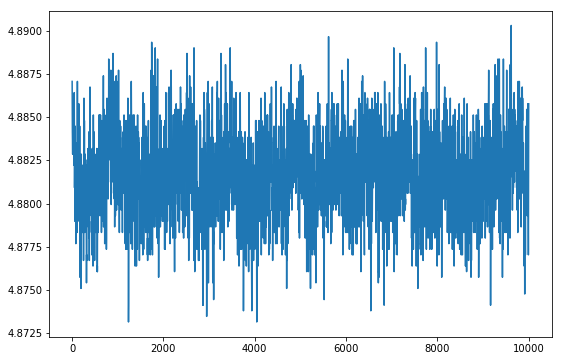

In [8]:
plt.plot(rawdata)
plt.show()

In [9]:
cavitylogic._scope.set_data_composition_to_yt()
cavitylogic._get_scope_data()

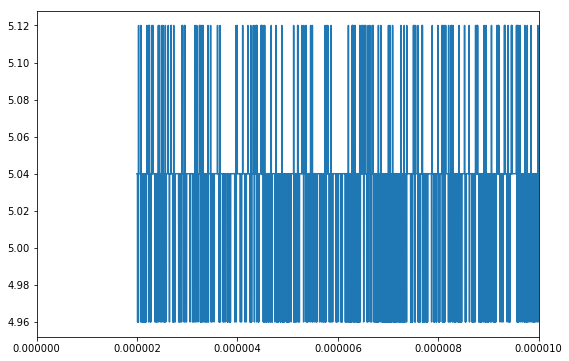

In [10]:
plt.plot(cavitylogic.time, cavitylogic.volts[3])
plt.xlim([0,0.00001])
plt.show()

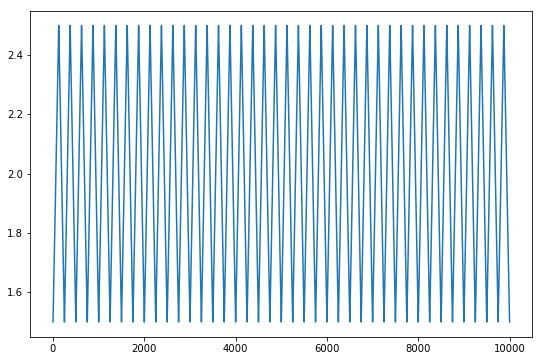

In [6]:
plt.plot(mynicard.ramp_function(np.linspace(0,1,10001),1,2, 40,0))
plt.show()